In [113]:
import pydicom
import csv
import os

In [114]:
tcia_lgg_raw = '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/'
tcia_gbm_raw = '/anvar/public_datasets/tcia/manifest-21CCx8fx964169794518489879/TCGA-GBM/'
len(os.listdir(tcia_lgg_raw)),len(os.listdir(tcia_gbm_raw))

(67, 136)

## For LGG

In [115]:
import numpy as np

sub_ids = next(os.walk(tcia_lgg_raw))[1]

## First, find FLAIR, T2, and T1-mprage scans based on expected file names
flair_paths=[]
t2_paths=[]
t1_paths=[]

for (root, __, __) in os.walk(tcia_lgg_raw):
    ##   FLAIR
    if  root.find('FLAIR') >0 and\
        root.find('T1') <0:
        flair_paths.append(root)
    if  root.find('flair') >0 and\
        root.find('T1') <0:
        flair_paths.append(root)
    if  root.find('Flair') >0 and\
        root.find('T1') <0:
        flair_paths.append(root)
    if  root.find('3.000000-58602') >0:
        flair_paths.append(root)
        

    ##   T2
    if  root.find('T2') > 0 and\
        root.find('FLAIR')<0:
        t2_paths.append(root)
    if  root.find('t2') > 0 and\
        root.find('FLAIR')< 0:
        t2_paths.append(root)
    if  root.find('FSE') > 0 and\
        root.find('T1')< 0:
        t2_paths.append(root)   
    if  root.find('fse') > 0 and\
        root.find('T1')< 0:
        t2_paths.append(root)   
    if  root.find('DOUBLEECHO') > 0 and\
        root.find('FLAIR')< 0:
        t2_paths.append(root)
        
    ##   T1 pre
    if  root.find('T1') > 0 and\
        root.find('AX') > 0 or\
        root.find('t1') > 0 or\
        root.find('MP RAGE') > 0 or\
        root.find('VOLUMAX') >0 or\
        root.find('VOLUMETRIC') >0 or\
        root.find('SPGR') > 0:
        t1_paths.append(root)

        
flair_paths = np.unique(flair_paths).tolist()
t2_paths = np.unique(t2_paths).tolist()
t1_paths = np.unique(t1_paths).tolist()

In [116]:
print(len(sub_ids), len(flair_paths), len(t2_paths), len(t1_paths))

66 69 90 157


In [117]:
# creating a list of subjects with package of four images
import pandas as pd
df_result = pd.DataFrame(columns = ['ID', 'T1', 'T1C', 'T2', 'FLAIR'])
num_tag = pydicom.tag.Tag(int('0020', 16), int('0011', 16)) # series number tag

for idx, sub in enumerate(sub_ids):
    # flair
    df_result.at[idx,'ID'] = sub
    fn_paths = list(filter(lambda x: sub in x, flair_paths)) # grab paths for this sub
    if len(fn_paths) == 1:
        df_result.at[idx,'FLAIR'] = fn_paths[0]
    # t2
    fn_paths = list(filter(lambda x: sub in x, t2_paths)) # grab paths for this sub
    if len(fn_paths) == 1:
        df_result.at[idx,'T2'] = fn_paths[0]

    # t1: comparing two with num tags
    fn_paths = list(filter(lambda x: sub in x, t1_paths)) # grab paths for this sub
    num_tag_list = []
    for fn_path in fn_paths:
        ds = pydicom.dcmread(fn_path+'/'+os.listdir(fn_path)[0])
        num_tag_list.append(ds[num_tag].value)
    try:
        df_result.at[idx,'T1C'] = fn_paths[num_tag_list.index(max(num_tag_list))]
        df_result.at[idx,'T1'] = fn_paths[num_tag_list.index(min(num_tag_list))]
    except:
        pass

In [118]:
df_result = pd.DataFrame(columns = ['ID', 'T1', 'T1C', 'T2', 'FLAIR'])
num_tag = pydicom.tag.Tag(int('0020', 16), int('0011', 16)) # series number tag

for idx, sub in enumerate(sub_ids):
    # flair
    df_result.at[idx,'ID'] = sub
    fn_paths = list(filter(lambda x: sub in x, flair_paths)) # grab paths for this sub
    if len(fn_paths) > 0:
        df_result.at[idx,'FLAIR'] = fn_paths[0]
    # t2
    fn_paths = list(filter(lambda x: sub in x, t2_paths)) # grab paths for this sub
    if len(fn_paths) > 0:
        df_result.at[idx,'T2'] = fn_paths[0]

    # t1: comparing two with num tags
    fn_paths = list(filter(lambda x: sub in x, t1_paths)) # grab paths for this sub
    num_tag_list = []
    for fn_path in fn_paths:
        ds = pydicom.dcmread(fn_path+'/'+os.listdir(fn_path)[0])
        num_tag_list.append(ds[num_tag].value)
    try:
        df_result.at[idx,'T1C'] = fn_paths[num_tag_list.index(max(num_tag_list))]
        df_result.at[idx,'T1'] = fn_paths[num_tag_list.index(min(num_tag_list))]
    except:
        pass

In [119]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      66 non-null     object
 1   T1      62 non-null     object
 2   T1C     62 non-null     object
 3   T2      64 non-null     object
 4   FLAIR   61 non-null     object
dtypes: object(5)
memory usage: 5.1+ KB


In [120]:
print(df_result['T1C'][5])

/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-DU-7306/05-12-1993-MRI BRAIN WWO CONTRAST-11323/11.000000-AX T1 POST GD FLAIR-17891


In [121]:
df_result[df_result.isna().any(axis=1)]

,ID,T1,T1C,T2,FLAIR
6,TCGA-CS-4942,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,NaN,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...
7,TCGA-CS-6186,NaN,NaN,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...
10,TCGA-DU-6402,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,NaN,NaN
22,TCGA-CS-6668,NaN,NaN,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...
40,TCGA-CS-4938,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,NaN
45,TCGA-CS-5390,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,NaN
54,TCGA-CS-5394,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,NaN
60,TCGA-DU-8158,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,NaN
62,TCGA-CS-6667,NaN,NaN,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...
65,TCGA-DU-6395,NaN,NaN,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...


In [122]:
df_result[df_result['ID'] == 'TCGA-DU-6395'].values

array([['TCGA-DU-6395', nan, nan,
        '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-DU-6395/02-09-1983-BRAINGD-38915/2.000000-ScanningSequence fse-66259',
        '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-DU-6395/02-09-1983-BRAINGD-38915/3.000000-ScanningSequence flair-95070']],
      dtype=object)

In [123]:
df_result.at[6, 'T2'] ='/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-CS-4942/TCGA-CS-4942/02-22-1997-MRI BRAIN WITHO-04689/401.000000-DUAL AX SE-07653'
df_result.at[10,'FLAIR'] = '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-DU-6402/12-31-1983-WAND BRAIN-73244/1.000000-axial diff.-30337'
df_result.at[10, 'T2'] = '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-DU-6402/12-31-1983-WAND BRAIN-73244/4.000000-axial perf.-20953'
df_result.at[40, 'FLAIR'] = '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-CS-4938/04-15-1996-JHN BRAIN MR OP-84760/2.000000-FASTBRAINEPIDIFF-74032'
df_result.at[45, 'FLAIR'] ='/anvar/public_datasets/tcia/manifest-21CCx8fx964169794518489879/TCGA-LGG/TCGA-CS-5390/03-07-1996-BRAINSTRYKER-97078/5.000000-BRAINSTRYKERDIFFUSION-72204'
df_result.at[54, 'FLAIR'] = '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-CS-5394/12-05-1995-JHN BRAIN-97935/4.000000-RETROORBITT2LATEECHOB-49308'
df_result.at[60, 'FLAIR'] = '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-DU-8158/09-22-1986-BRAIN WWO-21326/4.000000-DIFF 1000 24 FOV-88158'

In [125]:
df_result[df_result.isna().any(axis=1)]

,ID,T1,T1C,T2,FLAIR
7,TCGA-CS-6186,NaN,NaN,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...
22,TCGA-CS-6668,NaN,NaN,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...
62,TCGA-CS-6667,NaN,NaN,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...
65,TCGA-DU-6395,NaN,NaN,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...,/anvar/public_datasets/tcia/manifest-25ZdsnMy5...


In [182]:
df_result.at[7, 'T1C'] = '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-CS-6186/06-01-2000-MRI BRAIN per R-97608/1101.000000-STRYKER-27064'
df_result.at[7, 'T1'] = '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-CS-6186/06-01-2000-MRI BRAIN per R-97608/901.000000-T1 SE PRE-16483'

df_result.at[22, 'T1'] = '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-CS-6668/10-25-2001-MRI BRAIN per R-29896/701.000000-T1W3DSTRYKER-87183'
df_result.at[22, 'T1С'] = '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-CS-6668/10-25-2001-MRI BRAIN per R-29896/1101.000000-T1W3DSTRYKER-11217'

df_result.at[65, 'T1'] = '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-CS-6668/10-25-2001-MRI BRAIN per R-29896/701.000000-T1W3DSTRYKER-87183'
df_result.at[65, 'T1С'] = '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-CS-6668/10-25-2001-MRI BRAIN per R-29896/1101.000000-T1W3DSTRYKER-11217'

In [191]:
## original dataset
os.listdir('/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-DU-6395/')

FileNotFoundError: [Errno 2] No such file or directory: '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-CS-6395/'

In [190]:
# contours
os.listdir('/anvar/public_datasets/tcia/manifest-1588284345182/TCGA-LGG/TCGA-CS-6668/')

['10-25-2001-MRI BRAIN per R-29896']

In [171]:
df = pd.read_csv('/anvar/public_datasets/tcia/manifest-1588284345182/metadata.csv')

In [175]:
df

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.2.276.0.7230010.3.1.3.8323329.363456.1540933...,TCGA-GBM,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-02-0006,1.3.6.1.4.1.14519.5.2.1.1706.4001.149500105036...,MRI BRAIN W WO CONTRAMR,08-23-1996,AX T1 Glioma Segmentation Corrected,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,596.64 KB,.\TCGA-GBM\TCGA-02-0006\08-23-1996-MRI BRAIN W...,2021-07-01T23:58:55.447
1,1.2.276.0.7230010.3.1.3.8323329.363425.1540933...,TCGA-GBM,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-02-0006,1.3.6.1.4.1.14519.5.2.1.1706.4001.149500105036...,MRI BRAIN W WO CONTRAMR,08-23-1996,AX FLAIR Glioma Segmentation Corrected,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,596.64 KB,.\TCGA-GBM\TCGA-02-0006\08-23-1996-MRI BRAIN W...,2021-07-01T23:58:55.516
2,1.2.276.0.7230010.3.1.3.8323329.363465.1540933...,TCGA-GBM,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-02-0006,1.3.6.1.4.1.14519.5.2.1.1706.4001.149500105036...,MRI BRAIN W WO CONTRAMR,08-23-1996,AX T2 FSE Glioma Segmentation Corrected,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,596.64 KB,.\TCGA-GBM\TCGA-02-0006\08-23-1996-MRI BRAIN W...,2021-07-01T23:58:57.49
3,1.2.276.0.7230010.3.1.3.8323329.363974.1540933...,TCGA-GBM,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-02-0006,1.3.6.1.4.1.14519.5.2.1.1706.4001.149500105036...,MRI BRAIN W WO CONTRAMR,08-23-1996,AX T1 POST Glioma Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,596.62 KB,.\TCGA-GBM\TCGA-02-0006\08-23-1996-MRI BRAIN W...,2021-07-01T23:58:57.58
4,1.2.276.0.7230010.3.1.3.8323329.363423.1540933...,TCGA-GBM,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-02-0006,1.3.6.1.4.1.14519.5.2.1.1706.4001.149500105036...,MRI BRAIN W WO CONTRAMR,08-23-1996,AX T1 POST Glioma Segmentation Corrected,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,596.64 KB,.\TCGA-GBM\TCGA-02-0006\08-23-1996-MRI BRAIN W...,2021-07-01T23:58:59.453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1.2.276.0.7230010.3.1.3.8323329.413713.1540933...,TCGA-LGG,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-HT-8563,1.3.6.1.4.1.14519.5.2.1.2531.4003.104336479544...,MRI BRAIN FOR STEREOTACTIC WWO CONTR,12-09-1998,AX 3D SPGR Glioma Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,20.25 MB,.\TCGA-LGG\TCGA-HT-8563\12-09-1998-MRI BRAIN F...,2021-07-02T00:34:04.125
1300,1.2.276.0.7230010.3.1.3.8323329.407229.1540933...,TCGA-LGG,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-HT-A61A,1.3.6.1.4.1.14519.5.2.1.2531.4003.176077465885...,MRI BRAIN WWO CONTRAST,01-27-2000,3D AXIALIRSPGRFast Glioma Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,2.49 MB,.\TCGA-LGG\TCGA-HT-A61A\01-27-2000-MRI BRAIN W...,2021-07-02T00:34:06.144
1301,1.2.276.0.7230010.3.1.3.8323329.407671.1540933...,TCGA-LGG,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-HT-A61A,1.3.6.1.4.1.14519.5.2.1.2531.4003.176077465885...,MRI BRAIN WWO CONTRAST,01-27-2000,OPT FLAIR AX Glioma Segmentation Corrected,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,1.48 MB,.\TCGA-LGG\TCGA-HT-A61A\01-27-2000-MRI BRAIN W...,2021-07-02T00:34:06.648
1302,1.2.276.0.7230010.3.1.3.8323329.409428.1540933...,TCGA-LGG,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-HT-A61A,1.3.6.1.4.1.14519.5.2.1.2531.4003.176077465885...,MRI BRAIN WWO CONTRAST,01-27-2000,C 3D AXIALIRSPGRFast Glioma Segmentation Corre...,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,2.49 MB,.\TCGA-LGG\TCGA-HT-A61A\01-27-2000-MRI BRAIN W...,2021-07-02T00:34:08.662


In [142]:
import nibabel
import slicer
import matplotlib.pyplot as plt
from pydicom import dcmread

In [138]:
x = dcmread('/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-CS-6186/06-01-2000-MRI BRAIN per R-97608/1101.000000-STRYKER-27064/1-028.dcm')

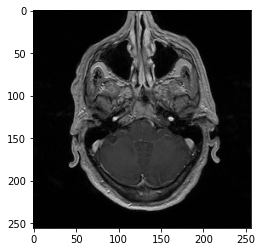

In [144]:
plt.imshow(x.pixel_array, cmap = 'gray')

In [151]:
from dicom_csv import join_tree, order_series, stack_images
from pathlib import Path

In [152]:
folder = Path('/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-CS-6186/06-01-2000-MRI BRAIN per R-97608/1101.000000-STRYKER-27064/')
df = dicom_csv.join_tree(dicom_path)

In [153]:
images2d = [dcmread(folder / row[1].PathToFolder / row[1].FileName) for row in df.iterrows()] 
image3d = stack_images(order_series(images2d))

In [156]:
from dpipe.im.visualize import slice3d 
slice3d(image3d)

/home/kate/miniconda3/lib/python3.9/site-packages/ipykernel/pylab/backend_inline.py:11: DeprecationWarning:

`ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`



interactive(children=(IntSlider(value=0, continuous_update=False, description='idx', max=117), Output()), _dom…

In [136]:
os.listdir('/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-CS-6186/06-01-2000-MRI BRAIN per R-97608/1101.000000-STRYKER-27064/1-028.dcm')

['1-097.dcm',
 '1-089.dcm',
 '1-047.dcm',
 '1-020.dcm',
 '1-111.dcm',
 '1-109.dcm',
 '1-087.dcm',
 '1-044.dcm',
 '1-070.dcm',
 '1-015.dcm',
 '1-053.dcm',
 '1-025.dcm',
 '1-085.dcm',
 '1-113.dcm',
 '1-118.dcm',
 '1-074.dcm',
 '1-078.dcm',
 '1-008.dcm',
 '1-067.dcm',
 '1-017.dcm',
 '1-028.dcm',
 '1-034.dcm',
 '1-058.dcm',
 '1-040.dcm',
 '1-051.dcm',
 '1-075.dcm',
 '1-011.dcm',
 '1-026.dcm',
 '1-001.dcm',
 '1-042.dcm',
 '1-102.dcm',
 '1-050.dcm',
 '1-052.dcm',
 '1-012.dcm',
 '1-032.dcm',
 '1-073.dcm',
 '1-071.dcm',
 '1-091.dcm',
 '1-069.dcm',
 '1-084.dcm',
 '1-003.dcm',
 '1-035.dcm',
 '1-024.dcm',
 '1-014.dcm',
 '1-036.dcm',
 '1-061.dcm',
 '1-018.dcm',
 '1-019.dcm',
 '1-054.dcm',
 '1-041.dcm',
 '1-007.dcm',
 '1-110.dcm',
 '1-103.dcm',
 '1-021.dcm',
 '1-083.dcm',
 '1-066.dcm',
 '1-080.dcm',
 '1-045.dcm',
 '1-082.dcm',
 '1-099.dcm',
 '1-031.dcm',
 '1-046.dcm',
 '1-063.dcm',
 '1-062.dcm',
 '1-090.dcm',
 '1-002.dcm',
 '1-095.dcm',
 '1-048.dcm',
 '1-081.dcm',
 '1-098.dcm',
 '1-093.dcm',
 '1-03

In [133]:
FixedIm

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 118)
	 Spacing    : (0.9375, 0.9375, 1.5)
	 Origin     : (-123.3451, -104.9456, 87.4931)
	 Direction  : [ 0.9936  0.0824  0.0779 -0.0918  0.9879  0.1251 -0.0666 -0.1315  0.9891]

In [107]:
import ants

In [130]:
FixedIm = ants.dicom_read('/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-CS-6186/06-01-2000-MRI BRAIN per R-97608/1101.000000-STRYKER-27064')

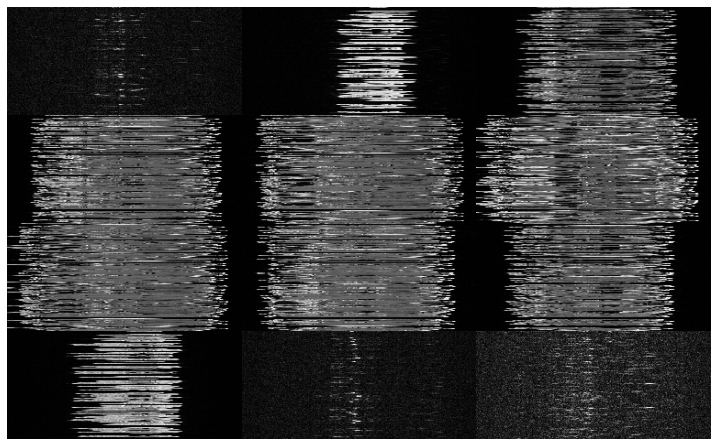

In [131]:
ants.plot(FixedIm)

In [104]:
os.listdir('/anvar/public_datasets/tcia/manifest-1588284345182/TCGA-LGG/TCGA-CS-6186/06-01-2000-MRI BRAIN per R-97608')

['300.000000-STRYKER Glioma Segmentation-41290',
 '300.000000-T2 AX FLAIR Glioma Segmentation-87268',
 '300.000000-STRYKER Glioma Segmentation Corrected-31145',
 '300.000000-T1 SE PRE Glioma Segmentation Corrected-42769',
 '300.000000-T2-WHOLE BRAIN Glioma Segmentation-68869',
 '300.000000-T2-WHOLE BRAIN Glioma Segmentation Corrected-83177',
 '300.000000-T1 SE PRE Glioma Segmentation-45631',
 '300.000000-T2 AX FLAIR Glioma Segmentation Corrected-82026']

In [105]:
# df_result.to_csv('lgg_paths.csv')

In [14]:
paths = pd.read_csv('../lgg_paths.csv')

## Saving folders

In [17]:
#!conda install -c conda-forge dcm2niix

In [42]:
import glob2
len(glob2.glob(savedir +'/**/t1.nii.gz'))

107

In [15]:
paths = pd.read_csv('../lgg_paths.csv')

In [16]:
os.listdir('/anvar/public_datasets/tcia/training_data')

['TCGA-02-0086',
 'TCGA-02-0048',
 'TCGA-02-0102',
 'TCGA-02-0059',
 'TCGA-02-0069',
 'TCGA-19-2624',
 'TCGA-06-0182',
 'TCGA-08-0360',
 'TCGA-06-0168',
 'TCGA-02-0006',
 'TCGA-19-2631',
 'TCGA-06-0133',
 'TCGA-12-1094',
 'TCGA-12-1602',
 'TCGA-06-2570',
 'TCGA-06-0119',
 'TCGA-06-0145',
 'TCGA-08-0509',
 'TCGA-06-0649',
 'TCGA-06-5408',
 'TCGA-02-0116',
 'TCGA-06-0188',
 'TCGA-76-6661',
 'TCGA-02-0047',
 'TCGA-12-3650',
 'TCGA-08-0354',
 'TCGA-02-0064',
 'TCGA-08-0529',
 'TCGA-14-1825',
 'TCGA-06-0162',
 'TCGA-06-0213',
 'TCGA-02-0033',
 'TCGA-08-0359',
 'TCGA-06-0241',
 'TCGA-08-0357',
 'TCGA-02-0054',
 'TCGA-06-0184',
 'TCGA-08-0358',
 'TCGA-12-1601',
 'TCGA-06-5413',
 'TCGA-14-1829',
 'TCGA-76-6191',
 'TCGA-02-0060',
 'TCGA-02-0075',
 'TCGA-06-0177',
 'TCGA-06-5412',
 'TCGA-06-0154',
 'TCGA-08-0350',
 'TCGA-08-0521',
 'TCGA-06-0179',
 'TCGA-19-5951',
 'TCGA-12-1598',
 'TCGA-14-0789',
 'TCGA-12-0616',
 'TCGA-02-0070',
 'TCGA-06-1084',
 'TCGA-12-0829',
 'TCGA-76-4932',
 'TCGA-02-0068

In [17]:
basedir = '/anvar/public_datasets/tcia/'
savedir = '/anvar/public_datasets/preproc_study/lgg/orig/'

In [19]:
import dicom2nifti
import dicom2nifti.settings as settings

# dicom2nifti.settings.disable_validate_slicecount()

for i in range(0, len(paths)):
    print(paths['ID'].iloc[i])
    try:
        os.mkdir(savedir + paths['ID'].iloc[i])
    except OSError as error:
#         print(error) 
        pass
    
    try:
        dicom2nifti.dicom_series_to_nifti(basedir + paths['FLAIR'].iloc[i][1:], 
                                          savedir + paths['ID'].iloc[i] + '/flair.nii.gz')
        dicom2nifti.dicom_series_to_nifti(basedir + paths['T2'].iloc[i][1:], 
                                          savedir + paths['ID'].iloc[i] + '/t2.nii.gz')
        dicom2nifti.dicom_series_to_nifti(basedir + paths['T1C'].iloc[i][1:], 
                                          savedir + paths['ID'].iloc[i] + '/t1c.nii.gz')
        dicom2nifti.dicom_series_to_nifti(basedir + paths['T1'].iloc[i][1:], 
                                          savedir + paths['ID'].iloc[i] + '/t1.nii.gz')
    except Exception as e:
        print(e)
        print('problems', paths['ID'].iloc[i]) 
        pass

TCGA-DU-7019
TCGA-DU-7302


KeyboardInterrupt: 

In [11]:
os.listdir('/anvar/public_datasets/preproc_study/lgg/orig/TCGA-CS-6188')

['T2.nii.gz',
 'FLAIR.nii.gz',
 'CT1.json',
 'FLAIRa.json',
 'flair.nii.gz',
 'T2a.nii.gz',
 'T1.nii.gz',
 't1.nii.gz',
 'T2b.nii.gz',
 'FLAIRb.nii.gz',
 'T1a.nii.gz',
 'T2.json',
 'T1b.nii.gz',
 'CT1a.nii.gz',
 'T1.json',
 'FLAIRa.nii.gz',
 'T2c.nii.gz',
 'CT1.nii.gz',
 't2.nii.gz',
 'FLAIR.json',
 'T2a.json',
 'CT1a.json',
 't1c.nii.gz',
 'CT1b.nii.gz',
 'T1a.json']

## Save GBM datasets

In [8]:
import pandas as pd
paths = pd.read_csv('../gbm_paths.csv')
basedir = '/anvar/public_datasets/tcia/'
savedir = '/anvar/public_datasets/preproc_study/gbm/orig/'
# os.makedirs('/anvar/public_datasets/preproc_study/gbm/orig/')

In [38]:
dicom2nifti.settings.disable_validate_slicecount()

for i in range(0, len(paths)):
    print(paths['ID'].iloc[i])
    try:
        os.mkdir(savedir + paths['ID'].iloc[i])
    except OSError as error:
#         print(error) 
        pass
    
    try:
      
        dicom2nifti.dicom_series_to_nifti(basedir + paths['T1C'].iloc[i][1:], 
                                          savedir + paths['ID'].iloc[i] + '/t1c.nii.gz')
        dicom2nifti.dicom_series_to_nifti(basedir + paths['T1'].iloc[i][1:], 
                                          savedir + paths['ID'].iloc[i] + '/t1.nii.gz')
        dicom2nifti.dicom_series_to_nifti(basedir + paths['FLAIR'].iloc[i][1:], 
                                          savedir + paths['ID'].iloc[i] + '/flair.nii.gz')
        dicom2nifti.dicom_series_to_nifti(basedir + paths['T2'].iloc[i][1:], 
                                          savedir + paths['ID'].iloc[i] + '/t2.nii.gz')
    except Exception as e:
        print(e)
        print('problems', paths['ID'].iloc[i]) 
        pass

TCGA-02-0034
TCGA-06-0158


Slice increment not consistent through all slices
---------------------------------------------------------
[-120.  123.  -80.] [0. 0. 0.]
[-120.  123.  -77.] [ 0.  0. -3.]
Instance Number: 3
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0158
TCGA-76-4934
TCGA-06-0187


Slice increment not consistent through all slices
---------------------------------------------------------
[-119.0121918 -120.5853653  -98.9268341] [0. 0. 0.]
[-119.0121918 -120.5853653  -93.9268341] [ 0.  0. -5.]
Instance Number: 4
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0187
TCGA-14-1829
TCGA-08-0356
TCGA-06-0137


Slice increment not consistent through all slices
---------------------------------------------------------
[-120.     -122.927   -73.1707] [0. 0. 0.]
[-120.     -122.927   -70.1707] [ 0.  0. -3.]
Instance Number: 3
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0137
TCGA-06-0649
TCGA-06-0646


Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
Removing duplicate slice from series
R

TCGA-02-0069
TCGA-06-0241
TCGA-06-0192
TCGA-12-1094
TCGA-76-4932
TCGA-12-0776
TCGA-08-0350
TCGA-02-0086
TCGA-19-1390
TCGA-02-0009
TCGA-06-5412
TCGA-08-0359
TCGA-02-0048
TCGA-06-5417
TCGA-19-2624
TCGA-12-0829
TCGA-02-0075
The length of the pixel data in the dataset (30512 bytes) doesn't match the expected length (131072 bytes). The dataset may be corrupted or there may be an issue with the pixel data handler.
problems TCGA-02-0075
TCGA-19-2631
TCGA-06-0175


Slice increment not consistent through all slices
---------------------------------------------------------
[-120.     -118.829   -90.7317] [0. 0. 0.]
[-120.     -118.829   -87.7317] [ 0.  0. -3.]
Instance Number: 3
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0175
TCGA-02-0011
TCGA-76-6657
TCGA-12-1093
TCGA-08-0512
TCGA-12-3650
TCGA-06-0240


Slice increment not consistent through all slices
---------------------------------------------------------
[-123.5609741 -142.2926788  -98.9268341] [0. 0. 0.]
[-123.5609741 -142.2926788  -93.9268341] [ 0.  0. -5.]
Instance Number: 4
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0240
TCGA-06-0122
TCGA-08-0390
TCGA-08-0521
TCGA-08-0352
TCGA-02-0060
TCGA-06-5413
TCGA-08-0354
TCGA-02-0059
TCGA-06-0238
TCGA-12-1098
TCGA-06-0162


Slice increment not consistent through all slices
---------------------------------------------------------
[-120.  120.  -64.] [0. 0. 0.]
[-120.  120.  -61.] [ 0.  0. -3.]
Instance Number: 3
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0162
TCGA-06-0184


Slice increment not consistent through all slices
---------------------------------------------------------
[-114.263  -124.799   -93.0734] [0. 0. 0.]
[-114.263  -124.799   -88.0734] [ 0.  0. -5.]
Instance Number: 4
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0184
TCGA-14-0789
TCGA-08-0358
TCGA-06-1084


Slice increment not consistent through all slices
---------------------------------------------------------
[-119.531  -132.994   -83.1222] [0. 0. 0.]
[-119.531  -132.994   -78.1222] [ 0.  0. -5.]
Instance Number: 4
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-1084
TCGA-02-0033
TCGA-08-0392
TCGA-76-6663
TCGA-76-4935
TCGA-08-0509
TCGA-06-0190


Slice increment not consistent through all slices
---------------------------------------------------------
[-122.3414612 -113.5609741  -94.2439041] [0. 0. 0.]
[-122.3414612 -113.5609741  -89.2439041] [ 0.  0. -5.]
Instance Number: 4
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0190
TCGA-06-0176


Slice increment not consistent through all slices
---------------------------------------------------------
[-120.585  -106.537   -52.6829] [0. 0. 0.]
[-120.585  -106.537   -49.6829] [ 0.  0. -3.]
Instance Number: 3
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0176
TCGA-02-0102
TCGA-02-0003
TCGA-19-5958
TCGA-02-0070
TCGA-06-0166


Slice increment not consistent through all slices
---------------------------------------------------------
[-120.  120.  -90.] [0. 0. 0.]
[-120.  120.  -87.] [ 0.  0. -3.]
Instance Number: 3
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0166
TCGA-08-0510
TCGA-14-1794
TCGA-06-1802
TCGA-12-1598
TCGA-76-6656
TCGA-08-0353
TCGA-76-6282
TCGA-06-0185


Slice increment not consistent through all slices
---------------------------------------------------------
[-117.3658524 -120.         -76.9024353] [0. 0. 0.]
[-117.3658524 -120.         -71.9024353] [ 0.  0. -5.]
Instance Number: 4
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0185
TCGA-06-0648


Slice increment not consistent through all slices
---------------------------------------------------------
[-116.266 -161.366  -44.1  ] [ 0.   0.  -2.5]
[-116.266 -161.366  -39.1  ] [ 0.  0. -5.]
Instance Number: 5
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0648
TCGA-06-0189
TCGA-06-0138
TCGA-02-0085
TCGA-08-0529
TCGA-19-1789
TCGA-06-0213


Slice increment not consistent through all slices
---------------------------------------------------------
[-120.  120.  -69.] [0. 0. 0.]
[-120.  120.  -66.] [ 0.  0. -3.]
Instance Number: 3
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0213
TCGA-06-0128


Slice increment not consistent through all slices
---------------------------------------------------------
[-120.  120.  -66.] [0. 0. 0.]
[-120.  120.  -63.] [ 0.  0. -3.]
Instance Number: 3
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0128
TCGA-06-6389
TCGA-02-0027
TCGA-14-1825
TCGA-76-6661
TCGA-14-1456
TCGA-06-0133
TCGA-06-2570
TCGA-06-0164


Slice increment not consistent through all slices
---------------------------------------------------------
[-120. -107.  -69.] [0. 0. 0.]
[-120. -107.  -66.] [ 0.  0. -3.]
Instance Number: 3
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0164
TCGA-02-0047
TCGA-02-0037
TCGA-02-0106
TCGA-08-0520
TCGA-08-0355
TCGA-76-6280


Slice increment not consistent through all slices
---------------------------------------------------------
[-106.845001   -120.1715226   -85.50410461] [0. 0. 0.]
[-106.845001   -120.1715226   -78.00410461] [ 0.   0.  -7.5]
Instance Number: 4
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-76-6280
TCGA-19-5960
TCGA-76-6285
TCGA-76-6664
TCGA-02-0087
TCGA-76-6193
TCGA-19-0963
TCGA-08-0389
TCGA-12-0616
TCGA-02-0054
TCGA-14-3477
TCGA-08-0385
TCGA-06-0119


Slice increment not consistent through all slices
---------------------------------------------------------
[-120.18293   -120.5853653  -91.31707  ] [0. 0. 0.]
[-120.18293   -120.5853653  -86.31707  ] [ 0.  0. -5.]
Instance Number: 4
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0119
TCGA-06-0149
TCGA-08-0357
TCGA-06-0168


Slice increment not consistent through all slices
---------------------------------------------------------
[-127.699997 -112.5       -61.299999] [0. 0. 0.]
[-127.699997 -112.5       -58.299999] [ 0.  0. -3.]
Instance Number: 3
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0168
TCGA-06-0644
TCGA-08-0524
TCGA-08-0360
TCGA-06-0179
TCGA-02-0006
TCGA-06-5408


Slice increment not consistent through all slices
---------------------------------------------------------
[-129.043  -119.534   -77.3609] [0. 0. 0.]
[-129.043  -119.534   -72.3609] [ 0.  0. -5.]
Instance Number: 4
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-5408
TCGA-06-0142


Slice increment not consistent through all slices
---------------------------------------------------------
[-125.300003 -129.399994  -92.099998] [0. 0. 0.]
[-125.300003 -129.399994  -89.099998] [ 0.  0. -3.]
Instance Number: 3
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0142
TCGA-27-1834
TCGA-19-5954
TCGA-76-6191
TCGA-06-0132


Slice increment not consistent through all slices
---------------------------------------------------------
[-114.7317047 -121.7560959  -79.0243912] [0. 0. 0.]
[-114.7317047 -121.7560959  -74.0243912] [ 0.  0. -5.]
Instance Number: 4
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0132
TCGA-06-0145
NOT_A_VOLUME
problems TCGA-06-0145
TCGA-06-0130


Slice increment not consistent through all slices
---------------------------------------------------------
[-120.  127.    9.] [ 0.  0. -3.]
[-120.  127.   15.] [ 0.  0. -6.]
Instance Number: 036
---------------------------------------------------------


TCGA-06-0154
SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0154
TCGA-02-0116
TCGA-02-0064
TCGA-12-1602
TCGA-19-5951
TCGA-76-6662
TCGA-12-1601
TCGA-06-0182
NOT_A_VOLUME
problems TCGA-06-0182
TCGA-02-0046
TCGA-08-0522
TCGA-06-0139
TCGA-27-1838
TCGA-06-0188


Slice increment not consistent through all slices
---------------------------------------------------------
[-126.0365906 -118.8292694  -77.2195129] [0. 0. 0.]
[-126.0365906 -118.8292694  -72.2195129] [ 0.  0. -5.]
Instance Number: 4
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0188
TCGA-06-0177


Slice increment not consistent through all slices
---------------------------------------------------------
[-119.531  -134.165   -86.6344] [0. 0. 0.]
[-119.531  -134.165   -81.6344] [ 0.  0. -5.]
Instance Number: 4
---------------------------------------------------------


SLICE_INCREMENT_INCONSISTENT
problems TCGA-06-0177
TCGA-27-2526
TCGA-02-0068


## Lets see the dimentions

In [ ]:
list_patients = paths['ID']
list_patients[0]

In [55]:
import numpy as np
import ants

sizes_frame = pd.DataFrame(columns = ['id','t1_x', 't1_y', 't1_z', 't1c_x', 't1c_y', 't1c_z'])

for i in list_patients:
    try:
        t1_size = np.shape(ants.image_read(savedir + i + '/t1.nii.gz').numpy())
        t1c_size = np.shape(ants.image_read(savedir + i + '/t1c.nii.gz').numpy())
        sizes_frame = sizes_frame.append(
        {'id': i,
        't1_x':t1_size[0],
        't1_y':t1_size[1],
        't1_z':t1_size[2],
        't1c_x':t1c_size[0],
        't1c_y':t1c_size[1],
        't1c_z':t1c_size[2]}, ignore_index=True
        )
    except Exception as e:
        print(e)
        pass

File /anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-0158/t1.nii.gz does not exist!
File /anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-0187/t1.nii.gz does not exist!
File /anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-0137/t1.nii.gz does not exist!
/build100/ANTsPy/itksource/Modules/IO/NIFTI/src/itkNiftiImageIO.cxx:1972:
itk::ERROR: ITK only supports orthonormal direction cosines.  No orthonormal definition found!
File /anvar/public_datasets/preproc_study/gbm/orig/TCGA-02-0075/t1.nii.gz does not exist!
File /anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-0175/t1.nii.gz does not exist!
File /anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-0240/t1.nii.gz does not exist!
File /anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-0162/t1.nii.gz does not exist!
File /anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-0184/t1.nii.gz does not exist!
/build100/ANTsPy/itksource/Modules/IO/NIFTI/src/itkNiftiImageIO.cxx:1972:
itk::ERROR: ITK only supports orthono

In [54]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-06-0168/')

['flair.nii.gz']

### Collecting paths

In [22]:
# paths = pd.read_csv('lgg_paths.csv')
basedir = '/anvar/public_datasets/tcia/'
savedir = '/anvar/public_datasets/preproc_study/gbm/dicom/'
os.makedirs('/anvar/public_datasets/preproc_study/gbm/dicom/')

FileExistsError: [Errno 17] File exists: '/anvar/public_datasets/preproc_study/gbm/dicom/'

In [58]:
import shutil

for i in range(0, len(paths)):
    print(paths['ID'].iloc[i])
    try:
#         os.mkdir(basedir + paths['ID'].iloc[i])
        shutil.copytree(basedir + paths['T1'].iloc[i][1:], savedir + paths['ID'].iloc[i] + '/T1/') 
        shutil.copytree(basedir + paths['T1C'].iloc[i][1:], savedir + paths['ID'].iloc[i] + '/CT1/') 
        shutil.copytree(basedir + paths['T2'].iloc[i][1:], savedir + paths['ID'].iloc[i] + '/T2') 
        shutil.copytree(basedir + paths['FLAIR'].iloc[i][1:], savedir + paths['ID'].iloc[i] + '/FLAIR/')
        
    except OSError as error:
        print(error) 
        pass  

TCGA-02-0034
[Errno 17] File exists: '/anvar/public_datasets/tcia/CGA-02-0034'
TCGA-06-0158
[Errno 17] File exists: '/anvar/public_datasets/tcia/CGA-06-0158'
TCGA-76-4934
[Errno 17] File exists: '/anvar/public_datasets/tcia/CGA-76-4934'
TCGA-06-0187
[Errno 17] File exists: '/anvar/public_datasets/tcia/CGA-06-0187'
TCGA-14-1829
[Errno 17] File exists: '/anvar/public_datasets/tcia/CGA-14-1829'
TCGA-08-0356
[Errno 17] File exists: '/anvar/public_datasets/tcia/CGA-08-0356'
TCGA-06-0137
[Errno 17] File exists: '/anvar/public_datasets/tcia/CGA-06-0137'
TCGA-06-0649
[Errno 17] File exists: '/anvar/public_datasets/tcia/CGA-06-0649'
TCGA-06-0646
[Errno 17] File exists: '/anvar/public_datasets/tcia/CGA-06-0646'
TCGA-02-0069
[Errno 17] File exists: '/anvar/public_datasets/tcia/CGA-02-0069'
TCGA-06-0241
[Errno 17] File exists: '/anvar/public_datasets/tcia/CGA-06-0241'
TCGA-06-0192
[Errno 17] File exists: '/anvar/public_datasets/tcia/CGA-06-0192'
TCGA-12-1094
[Errno 17] File exists: '/anvar/public_

### For LGG

In [192]:
paths = pd.read_csv('../lgg_paths.csv')

In [194]:
paths = pd.read_csv('../lgg_paths.csv')
basedir = '/anvar/public_datasets/tcia/'
savedir = '/anvar/public_datasets/preproc_study/lgg/dicom/'
os.makedirs('/anvar/public_datasets/preproc_study/lgg/dicom/')

In [195]:
import shutil

for i in range(0, len(paths)):
    print(paths['ID'].iloc[i])
    try:
        os.mkdir(basedir + paths['ID'].iloc[i])
        shutil.copytree(basedir + paths['T1'].iloc[i][1:], savedir + paths['ID'].iloc[i] + '/T1/') 
        shutil.copytree(basedir + paths['T1C'].iloc[i][1:], savedir + paths['ID'].iloc[i] + '/CT1/') 
        shutil.copytree(basedir + paths['T2'].iloc[i][1:], savedir + paths['ID'].iloc[i] + '/T2') 
        shutil.copytree(basedir + paths['FLAIR'].iloc[i][1:], savedir + paths['ID'].iloc[i] + '/FLAIR/')
        
    except OSError as error:
        print(error) 
        pass  

TCGA-DU-7019
TCGA-DU-7302
TCGA-DU-5852
TCGA-DU-7014
TCGA-CS-6669
TCGA-DU-6405
TCGA-DU-5851
TCGA-DU-5854
TCGA-DU-6408
TCGA-DU-5874
TCGA-CS-5396
TCGA-DU-7306
TCGA-CS-5393
TCGA-DU-5849
TCGA-DU-6402
TCGA-CS-6670
TCGA-DU-5855
TCGA-DU-6407
TCGA-CS-4938
TCGA-CS-5390
TCGA-DU-7309
TCGA-CS-6186
TCGA-DU-7013
TCGA-DU-7015
TCGA-CS-5395
TCGA-CS-6666
TCGA-CS-4943
TCGA-CS-4941
TCGA-DU-8165
TCGA-CS-6667
TCGA-DU-5871
TCGA-DU-7010
TCGA-DU-6400
TCGA-DU-7300
TCGA-CS-6290
TCGA-DU-8164
TCGA-DU-7304
TCGA-DU-8166
TCGA-CS-6665
TCGA-DU-7301
TCGA-CS-4942
TCGA-DU-5872
TCGA-DU-7298
TCGA-DU-5853
TCGA-CS-5397
TCGA-CS-5394
TCGA-DU-7299
TCGA-CS-4944
TCGA-DU-6410
TCGA-DU-7294
TCGA-DU-8162
TCGA-CS-6668
TCGA-DU-7008
TCGA-DU-A5TP
TCGA-DU-6542
TCGA-DU-8158
TCGA-DU-8167
TCGA-CS-6188
TCGA-DU-8163
TCGA-DU-6401
TCGA-DU-6404
TCGA-DU-6397
TCGA-DU-6399
TCGA-DU-7018
TCGA-DU-8168
TCGA-DU-6395


In [35]:
import glob
glob.glob('/anvar/public_datasets/tcia/manifest-1588284345182/TCGA-GBM/TCGA-02-0086/*/*')

rtdir = '/anvar/public_datasets/tcia/manifest-1588284345182/TCGA-LGG/'

In [36]:
len(os.listdir(rtdir))

66

In [37]:
len(glob.glob(savedir + '/*/' + '/RTSTRUCT/'))

38

In [38]:
rtdir

'/anvar/public_datasets/tcia/manifest-1588284345182/TCGA-LGG/'

In [39]:
import shutil

for i in range(0, len(paths)):
    print(paths['ID'].iloc[i])
    try:
#         os.mkdir(savedir + paths['ID'].iloc[i] + '/')
        print(glob.glob(rtdir + paths['ID'].iloc[i] +'/*/'))
        shutil.copytree(glob.glob(rtdir + paths['ID'].iloc[i] +'/*/')[0], savedir + paths['ID'].iloc[i] + '/RTSTRUCT/') 
      
    except Exception as error:
        print(error) 
        pass  
          

TCGA-DU-7019
['/anvar/public_datasets/tcia/manifest-1588284345182/TCGA-LGG/TCGA-DU-7019/09-08-1994-MRI BRAIN WWO CONTRAST-36813/']
[Errno 17] File exists: '/anvar/public_datasets/preproc_study/lgg/dicom/TCGA-DU-7019/RTSTRUCT/'
TCGA-DU-7302
['/anvar/public_datasets/tcia/manifest-1588284345182/TCGA-LGG/TCGA-DU-7302/12-03-1991-MRI BRAIN WWO CONTRAST-41440/']
[Errno 17] File exists: '/anvar/public_datasets/preproc_study/lgg/dicom/TCGA-DU-7302/RTSTRUCT/'
TCGA-DU-5852
[]
list index out of range
TCGA-DU-7014
['/anvar/public_datasets/tcia/manifest-1588284345182/TCGA-LGG/TCGA-DU-7014/06-18-1986-TUMOR VOL.- WAND-80617/']
[Errno 17] File exists: '/anvar/public_datasets/preproc_study/lgg/dicom/TCGA-DU-7014/RTSTRUCT/'
TCGA-CS-6669
['/anvar/public_datasets/tcia/manifest-1588284345182/TCGA-LGG/TCGA-CS-6669/01-02-2002-MRI BRAIN COMBO-45633/']
[Errno 17] File exists: '/anvar/public_datasets/preproc_study/lgg/dicom/TCGA-CS-6669/RTSTRUCT/'
TCGA-DU-6405
[]
list index out of range
TCGA-DU-5851
['/anvar/pub

In [40]:
len(paths)

66